# Python Simulator

In addition to the built-in simulator provided by `isqc`, we also provide an additional simulator based on Python.

## Create isQ Code


Name the code file `python_sim_quick_start.isq` and place it in the same directory.

This file creates two qubits, applies an `H` gate to each of them, and performs measurement at the end.

```c++
import std;


qbit q[2];

unit main() {
    H(q[0]);
    H(q[1]);
    M(q[0]);
    M(q[1]);
}
```

We use tempfile instead of a real file.

In [1]:
FILE_CONTENT = """\
import std;


qbit q[2];

unit main() {
    H(q[0]);
    H(q[1]);
    M(q[0]);
    M(q[1]);
}"""

## Create Quantum Circuit

We provide IsqCircuit for building quantum circuits, along with three different simulation backends: `NumpyBackend`, `AutogradBackend`, and `TorchBackend`.

First, we use the basic NumPy backend to simulate the circuit.

In [2]:
import tempfile
from pathlib import Path

from isqtools import IsqCircuit
from isqtools.backend import AutogradBackend, NumpyBackend, TorchBackend

with tempfile.TemporaryDirectory() as temp_dir:
    temp_dir_path = Path(temp_dir)
    temp_file_path = temp_dir_path / "python_sim_quick_start.isq"
    with open(temp_file_path, "w") as temp_file:
        temp_file.write(FILE_CONTENT)

    backend = NumpyBackend()
    qc = IsqCircuit(
        file=str(temp_file_path),
        backend=backend,
        sample=False,
    )

    print(f"Probability results:", qc.measure())
    print(
        "Each item of the array represents these states:",
        "`00`",
        "`01`",
        "`10`",
        "`11`",
    )
    print()
    print(f"Qcis:\n{qc}")

Probability results: [0.25 0.25 0.25 0.25]
Each item of the array represents these states: `00` `01` `10` `11`

Qcis:
H Q0
H Q1
M Q0
M Q1


## Non-Sampling Mode

When `sample=False`, all three backends—`NumpyBackend`, `AutogradBackend`, and `TorchBackend`—output the corresponding probability distribution.

Note that when using `PyTorch` as the backend, the output type is `torch.Tensor`.

In [3]:
with tempfile.TemporaryDirectory() as temp_dir:
    temp_dir_path = Path(temp_dir)
    temp_file_path = temp_dir_path / "python_sim_quick_start.isq"
    with open(temp_file_path, "w") as temp_file:
        temp_file.write(FILE_CONTENT)

    backends = {
        "numpy": NumpyBackend(),
        "autograd": AutogradBackend(),
        "torch": TorchBackend(),
    }

    for backend_name, backend in backends.items():
        qc = IsqCircuit(
            file=str(temp_file_path),
            backend=backend,
            sample=False,
        )
        print(
            f"Probability results of {backend_name}: {qc.measure()}, "
            f"and return type: {type(qc.measure())}"
        )

Probability results of numpy: [0.25 0.25 0.25 0.25], and return type: <class 'numpy.ndarray'>
Probability results of autograd: [0.25 0.25 0.25 0.25], and return type: <class 'numpy.ndarray'>
Probability results of torch: tensor([0.2500, 0.2500, 0.2500, 0.2500]), and return type: <class 'torch.Tensor'>


## Sampling Mode

When `sample=True`, all three backends—`NumpyBackend`, `AutogradBackend`, and `TorchBackend`—output the corresponding sampling results. In this mode, you need to specify the number of `shots`; by default, `shots=100`.

Note that the output is a Python built-in `dict`, and the order of qubit outcomes is not guaranteed—e.g., `10` may appear before `00`.

In [4]:
with tempfile.TemporaryDirectory() as temp_dir:
    temp_dir_path = Path(temp_dir)
    temp_file_path = temp_dir_path / "python_sim_quick_start.isq"
    with open(temp_file_path, "w") as temp_file:
        temp_file.write(FILE_CONTENT)
    for backend_name, backend in backends.items():
        qc = IsqCircuit(
            file=str(temp_file_path),
            backend=backend,
            sample=True,
            shots=1000,
        )
        print(
            f"Sample results of {backend_name}: {qc.measure()}, "
            f"and return type: {type(qc.measure())}"
        )

Sample results of numpy: {'11': 260, '00': 241, '10': 242, '01': 257}, and return type: <class 'dict'>
Sample results of autograd: {'00': 229, '01': 262, '10': 270, '11': 239}, and return type: <class 'dict'>
Sample results of torch: {'10': 277, '11': 238, '00': 236, '01': 249}, and return type: <class 'dict'>


If you need to compare the order of measurement results, you can convert them using the following method.

In [5]:
res_dict = qc.measure()
ordered_res_dict = qc.sort_dict(res_dict)
res_dict_array = qc.dict2array(res_dict)
print(f"Naive sample results {res_dict}.")
print(f"Ordered Sample results {ordered_res_dict}.")
print(f"Transfer Sample results to array: {res_dict_array}.")

Naive sample results {'11': 279, '01': 237, '10': 238, '00': 246}.
Ordered Sample results {'00': 246, '01': 237, '10': 238, '11': 279}.
Transfer Sample results to array: [0.246 0.237 0.238 0.279].


## Circuit Visualization

For the `QCIS` instruction set generated from `isQ` files, we provide a simple interface for circuit visualization.

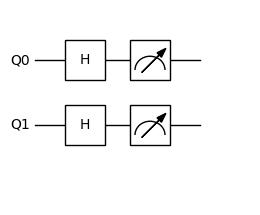

In [6]:
from isqtools.draw import Drawer

with tempfile.TemporaryDirectory() as temp_dir:
    temp_dir_path = Path(temp_dir)
    temp_file_path = temp_dir_path / "python_sim_quick_start.isq"
    with open(temp_file_path, "w") as temp_file:
        temp_file.write(FILE_CONTENT)
    backend = NumpyBackend()
    qc = IsqCircuit(
        file=str(temp_file_path),
        backend=backend,
        sample=False,
    )

    dr = Drawer()
    dr.plot(qc.qcis)

## Environment Information

The following versions of software and libraries are used in this tutorial:

In [7]:
import platform
import subprocess
from importlib.metadata import version

print(f"Python version used in this tutorial: {platform.python_version()}")
print(f"Execution environment: {platform.system()} {platform.release()}\n")


isqc_version = subprocess.check_output(
    ["isqc", "-V"], stderr=subprocess.STDOUT, text=True
).strip()
print(f"isqc version: {isqc_version}")

isqtools_version = version("isqtools")
print(f"isqtools version: {isqtools_version}")

numpy_version = version("numpy")
print(f"NumPy version: {isqtools_version}")

autograd_version = version("autograd")
print(f"Autograd version: {autograd_version}")

torch_version = version("torch")
print(f"Torch version: {torch_version}")

Python version used in this tutorial: 3.13.5
Execution environment: Linux 6.12.41

isqc version: isQ Compiler 0.2.5
isqtools version: 1.3.0
NumPy version: 1.3.0
Autograd version: 1.8.0
Torch version: 2.7.1
